# Functional Demostration

In [1]:
from pathfinder import Pathfinder

# abs_paths = ['']
# relative_paths = Pathfinder.relative_paths_from_abs(abs_paths)

relative_paths = [['..', '..', '..', '..', '..', '..', '已完成', 'Bridges', 'bitbucket', 'github', 'codes'],
                  ['..', '..', '..', '..', '..', 'Signal Generators', 'bitbucket', 'github', 'codes'],
                  ['..', '..', '..', '..', '..', 'Utilities', 'bitbucket', 'github', 'codes'],
                  ['..', '..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

In [2]:
import pandas as pd

#https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In [3]:
import os

from bridges.ftdi.adapters.micropython import machine
from bridges.ftdi.controllers.i2c import I2cController
from sigma.sigma_dsp.adau import ADAU1401
from utilities.adapters import peripherals

## Debug mode?

In [4]:
cls = ADAU1401

cls.DEBUG_MODE_SHOW_BUS_DATA = False         # whether to show bus data. 
cls.DEBUG_MODE_PRINT_REGISTER = False        # whether to print registers. 

## DSP processor

In [5]:
with_hardware_device = True  # set True if hardware is connected.

if with_hardware_device:
    
    ctrl = I2cController()
    _machine = ctrl.get_gpio()

    _i2c = ctrl.I2C()

    _pin_reset = _machine.Pin('ADBUS4', mode = machine.Pin.OUT)
    _pin_reset.high()

else:
    _i2c = _pin_reset = None  # using None for testing without actual hardware device.

bus = peripherals.I2C(_i2c)

In [6]:
# bus = fx2lp.I2C(as_400KHz = False)

In [7]:
dsp = ADAU1401(bus, pin_reset = _pin_reset)

## SigmStudio project file

In [8]:
SigmStudio_project_file_url = os.sep.join(['..', '..', 'SigmaStudio projects', 'projects', 'demo', 'demo.dspproj'])
SigmStudio_project_file_url

'..\\..\\SigmaStudio projects\\projects\\demo\\demo.dspproj'

![](https://github.com/Wei1234c/SigmaDSP/blob/master/SigmaStudio%20projects/projects/demo/demo.png?raw=true)

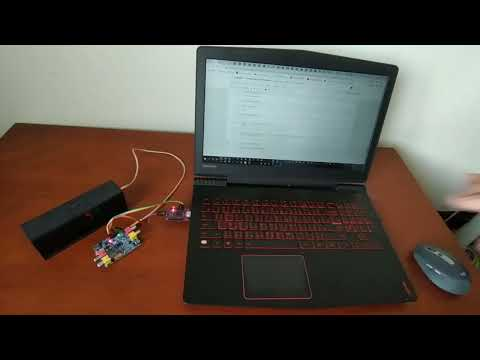

In [9]:
from IPython.display import YouTubeVideo

YouTubeVideo('XHlZtDsa4oE', width=800, height=300)

## Factory

In [10]:
import os
from sigma.factory import Factory 

project_xml_file_url = os.sep.join(['..', '..', 'SigmaStudio projects', 'projects', 'demo', 'demo.xml'])
class_files_root_url = os.sep.join(['..', '..', 'codes', 'sigma', 'sigma_studio', 'toolbox', 'cells']) 

factory = Factory(project_xml_file_url = project_xml_file_url,
                  class_files_root_url = class_files_root_url,
                  dsp = dsp
                 )

## IC

In [11]:
# showing cells, algorithms, parameters of this project

ic = factory.get_ic()
ic.df

param_full_name  \
algorithm_name       cell_name            param_name                                
FIRFiltAlg           FIR0                 fircoeff_0        FIRFiltAlg1fircoeff_0   
                     FIR1                 fircoeff_0        FIRFiltAlg2fircoeff_0   
                     FIR2                 fircoeff_0        FIRFiltAlg3fircoeff_0   
                     FIR3                 fircoeff_0        FIRFiltAlg4fircoeff_0   
Gain1940AlgNS        Gain_in0                                      Gain1940AlgNS3   
                     Gain_in1                                      Gain1940AlgNS2   
                     Gain_in2                                      Gain1940AlgNS7   
                     Gain_in3                                      Gain1940AlgNS8   
                     Gain_out0                                     Gain1940AlgNS1   
                     Gain_out1                                     Gain1940AlgNS4   
                     Gain_out2                                     Gain1940AlgNS5   
                     Gain_out3                                     Gain1940AlgNS6   
MonoNoPostGain3dBFix Compressor0                            MonoNoPostGain3dBFix1   
                                          RMS            MonoNoPostGain3dBFix1RMS   
                                          decay        MonoNoPostGain3dBFix1decay   
                                          hold          MonoNoPostGain3dBFix1hold   
                                          level        MonoNoPostGain3dBFix1level   
                     Compressor1                            MonoNoPostGain3dBFix2   
                                          RMS            MonoNoPostGain3dBFix2RMS   
                                          decay        MonoNoPostGain3dBFix2decay   
                                          hold          MonoNoPostGain3dBFix2hold   
                                          level        MonoNoPostGain3dBFix2level   
                     Compressor2                            MonoNoPostGain3dBFix3   
                                          RMS            MonoNoPostGain3dBFix3RMS   
                                          decay        MonoNoPostGain3dBFix3decay   
                                          hold          MonoNoPostGain3dBFix3hold   
                                          level        MonoNoPostGain3dBFix3level   
                     Compressor3                            MonoNoPostGain3dBFix4   
                                          RMS            MonoNoPostGain3dBFix4RMS   
                                          decay        MonoNoPostGain3dBFix4decay   
                                          hold          MonoNoPostGain3dBFix4hold   
                                          level        MonoNoPostGain3dBFix4level   
MultCtrlDelGrowAlg   Delay0                                   MultCtrlDelGrowAlg1   
                     Delay1                                   MultCtrlDelGrowAlg2   
                     Delay2                                   MultCtrlDelGrowAlg3   
                     Delay3                                   MultCtrlDelGrowAlg4   
MuteNoSlewAlg        Mute000              mute                 MuteNoSlewAlg1mute   
                     Mute001              mute                 MuteNoSlewAlg4mute   
                     Mute002              mute                 MuteNoSlewAlg7mute   
                     Mute003              mute                MuteNoSlewAlg10mute   
                     Mute010              mute                 MuteNoSlewAlg2mute   
                     Mute011              mute                 MuteNoSlewAlg6mute   
                     Mute012              mute                 MuteNoSlewAlg9mute   
                     Mute013              mute                MuteNoSlewAlg12mute   
                     Mute100              mute                MuteNoSlewAlg17mute   
                     Mute101              mute                MuteNoSle

## Cells 

In [12]:
cells = factory.get_cells()

### Get Cell objects ready for use.

In [13]:
## un-comment this to generate a script to embody Cell objects.

# for o in factory.get_cells_manifest():
#     print(o) 

In [14]:
# assign variable names to each Cell for easy access.

compressor0 = cells['Compressor0']  # Mono RMS Full Range (No Post Gain)( 1 )
compressor1 = cells['Compressor1']  # Mono RMS Full Range (No Post Gain)( 1 )
compressor2 = cells['Compressor2']  # Mono RMS Full Range (No Post Gain)( 1 )
compressor3 = cells['Compressor3']  # Mono RMS Full Range (No Post Gain)( 1 )
delay0 = cells['Delay0']  # Del_Grow( 1 )
delay1 = cells['Delay1']  # Del_Grow( 1 )
delay2 = cells['Delay2']  # Del_Grow( 1 )
delay3 = cells['Delay3']  # Del_Grow( 1 )
fir0 = cells['FIR0']  # FIR( 1 )
fir1 = cells['FIR1']  # FIR( 1 )
fir2 = cells['FIR2']  # FIR( 1 )
fir3 = cells['FIR3']  # FIR( 1 )
gain_in0 = cells['Gain_in0']  # Gain (no slew)( 1 )
gain_in1 = cells['Gain_in1']  # Gain (no slew)( 1 )
gain_in2 = cells['Gain_in2']  # Gain (no slew)( 1 )
gain_in3 = cells['Gain_in3']  # Gain (no slew)( 1 )
gain_out0 = cells['Gain_out0']  # Gain (no slew)( 1 )
gain_out1 = cells['Gain_out1']  # Gain (no slew)( 1 )
gain_out2 = cells['Gain_out2']  # Gain (no slew)( 1 )
gain_out3 = cells['Gain_out3']  # Gain (no slew)( 1 )
merger0 = cells['Merger0']  # Signal MixerC
merger1 = cells['Merger1']  # Signal MixerC
merger2 = cells['Merger2']  # Signal MixerC
merger3 = cells['Merger3']  # Signal MixerC
mute000 = cells['Mute000']  # No Slew (Standard)( 1 )
mute001 = cells['Mute001']  # No Slew (Standard)( 1 )
mute002 = cells['Mute002']  # No Slew (Standard)( 1 )
mute003 = cells['Mute003']  # No Slew (Standard)( 1 )
mute010 = cells['Mute010']  # No Slew (Standard)( 1 )
mute011 = cells['Mute011']  # No Slew (Standard)( 1 )
mute012 = cells['Mute012']  # No Slew (Standard)( 1 )
mute013 = cells['Mute013']  # No Slew (Standard)( 1 )
mute100 = cells['Mute100']  # No Slew (Standard)( 1 )
mute101 = cells['Mute101']  # No Slew (Standard)( 1 )
mute102 = cells['Mute102']  # No Slew (Standard)( 1 )
mute103 = cells['Mute103']  # No Slew (Standard)( 1 )
mute110 = cells['Mute110']  # No Slew (Standard)( 1 )
mute111 = cells['Mute111']  # No Slew (Standard)( 1 )
mute112 = cells['Mute112']  # No Slew (Standard)( 1 )
mute113 = cells['Mute113']  # No Slew (Standard)( 1 )
mute_in0 = cells['Mute_in0']  # No Slew (Standard)( 1 )
mute_in1 = cells['Mute_in1']  # No Slew (Standard)( 1 )
mute_in2 = cells['Mute_in2']  # No Slew (Standard)( 1 )
mute_in3 = cells['Mute_in3']  # No Slew (Standard)( 1 )
mute_out0 = cells['Mute_out0']  # No Slew (Standard)( 1 )
mute_out1 = cells['Mute_out1']  # No Slew (Standard)( 1 )
mute_out2 = cells['Mute_out2']  # No Slew (Standard)( 1 )
mute_out3 = cells['Mute_out3']  # No Slew (Standard)( 1 )
param_eq_in0 = cells['Param EQ_in0']  # PEQ1Chan - Double Precision( 1 )
param_eq_in1 = cells['Param EQ_in1']  # PEQ1Chan - Double Precision( 1 )
param_eq_in2 = cells['Param EQ_in2']  # PEQ1Chan - Double Precision( 1 )
param_eq_in3 = cells['Param EQ_in3']  # PEQ1Chan - Double Precision( 1 )
param_eq_out0 = cells['Param EQ_out0']  # PEQ1Chan - Double Precision( 1 )
param_eq_out1 = cells['Param EQ_out1']  # PEQ1Chan - Double Precision( 1 )
param_eq_out2 = cells['Param EQ_out2']  # PEQ1Chan - Double Precision( 1 )
param_eq_out3 = cells['Param EQ_out3']  # PEQ1Chan - Double Precision( 1 )
source_switch_0 = cells['Source_Switch_0']  # Stereo SW Slew( 3 )
source_switch_1 = cells['Source_Switch_1']  # Stereo SW Slew( 3 )
tone1 = cells['Tone1']  # Tone Synthesis (lookup/sine)( 1 )
tone2 = cells['Tone2']  # Tone Synthesis (lookup/sine)( 1 )
volume_control_in0 = cells['Volume_Control_in0']  # Gain (RC Slew)( 1 )
volume_control_in1 = cells['Volume_Control_in1']  # Gain (RC Slew)( 1 )
volume_control_out01 = cells['Volume_Control_out01']  # Gain (RC Slew)( 1 )
volume_control_out23 = cells['Volume_Control_out23']  # Gain (RC Slew)( 1 )
white_noise = cells['White_Noise']  # White Noise( 1 )

## Functional Demostration

In [15]:
# switch to sine tone

source_switch_0.switch(0)

In [16]:
# get cell by name

tone2 = factory.get_cell_by_name('Tone2')

In [17]:
# disable sine tones

tone1.enable(False)
tone2.enable(False)

In [18]:
# enable sine tones

tone1.enable(True)
tone2.enable(True)

In [19]:
# set frequency 

tone1.set_frequency(440)
tone2.set_frequency(436)

In [20]:
# set frequency 

tone1.set_frequency(1100)
tone2.set_frequency(1104)

In [21]:
# switch to white noise

source_switch_0.switch(1)

In [22]:
# decrease volume

volume_control_in0.set_dB(-20)

In [23]:
# increase volume

volume_control_in0.set_dB(0)

In [24]:
# mute input

mute_in0.mute(True)
mute_in1.mute(True)

In [25]:
# un-mute input

mute_in0.mute(False)
mute_in1.mute(False)

In [26]:
# disable white noise

white_noise.enable(False)

In [27]:
# enable white noise

white_noise.enable(True)

In [28]:
# set input0 dB = 0

gain_in0.set_dB(0)

In [29]:
# set input0 dB = -10

gain_in0.set_dB(-10)

In [30]:
# read input0 dB value

gain_in0.get_dB()

-10.000002514143702

In [31]:
# read input0 gain value

gain_in0.get_gain()

0.31622767448425293

In [32]:
# set input0 gain = 1

gain_in0.set_gain(1)

In [33]:
# check input0 dB value

gain_in0.get_dB()

0.0

In [34]:
# check input0 gain value

gain_in0.get_gain()

1.0

In [35]:
# read FIR0's coefficients

coeffs = fir0.get_coefficients()
coeffs

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [36]:
# set and check FIR0's coefficients

fir0.set_coefficients([1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0])
fir0.get_coefficients()

[1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]

In [37]:
# coefficients of FIR0 are stored in a "LookUpTable"

fir0.get_table().numbers

[1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]

In [38]:
# set delay samples

delay0.set_delayed_samples(1)

In [39]:
# set delay samples

delay1.set_delayed_samples(1)

In [40]:
# read and check delay samples

delay0.get_delayed_samples()

1

In [41]:
# read and check delay milliseconds

delayed_ms = delay0.get_delayed_ms()
delayed_ms

0.020833333333333332

In [42]:
# set delay milliseconds

delay0.set_delayed_ms(delayed_ms * 2)

In [43]:
# read and check delay samples

delay0.get_delayed_samples()

2

In [44]:
# read PEQ0's coefficients

coeffs = param_eq_in0.get_parameters_values()
coeffs

[['0B1', 1.0016894340515137],
 ['1A1', 1.995591640472412],
 ['1B1', -1.995591640472412],
 ['2A1', -0.9956583976745605],
 ['2B1', 0.9939688444137573]]

In [45]:
# set and check PEQ0's coefficients

coeffs[2][1] = -1.0

param_eq_in0.set_parameters_values(coeffs)
param_eq_in0.get_parameters_values()

[['0B1', 1.0016894340515137],
 ['1A1', 1.995591640472412],
 ['1B1', -1.0],
 ['2A1', -0.9956583976745605],
 ['2B1', 0.9939688444137573]]

In [46]:
# reload from EEPROM, equivalent to soft-reset

dsp.reload_from_eeprom()